# Siniestros Viales CABA

En este archivo se realizará un análisis exploratorio de los datos del archivo homicidios.csv, hoja VICTIMAS en búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados.

In [7]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

sys.path.append("..")
# importar librerías personalizadas de ./functions/EDA.py
from functions.EDA import get_frequency

## Cargar los Datos

In [8]:
# se importa los dataframe
victimas = pd.read_excel('../src/data/homicidios.xlsx', sheet_name='VICTIMAS')

## Exploración de los datos

### Vista rápida de los datos

In [9]:
# se verifica la estructura de df victimas
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [10]:
# breve análisis descriptivo de los datos
victimas.describe()

,FECHA,AAAA,MM,DD
count,717,717.000000,717.000000,717.000000
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000
std,NaN,1.672655,3.575140,8.683358


In [11]:
# visualización de las primeras filas
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


### Comprensión de variables categóricas

In [12]:
# ver distribución del ROL
get_frequency(victimas, 'ROL')

,ROL,frequency,percentage
0,CONDUCTOR,330,46.03
1,PEATON,267,37.24
2,PASAJERO_ACOMPAÑANTE,80,11.16
3,CICLISTA,29,4.04
4,SD,11,1.53


In [13]:
# ver distribución de VICTIMA
get_frequency(victimas, 'VICTIMA')

,VICTIMA,frequency,percentage
0,MOTO,303,42.26
1,PEATON,267,37.24
2,AUTO,94,13.11
3,BICICLETA,29,4.04
4,SD,9,1.26
5,CARGAS,7,0.98
6,PASAJEROS,5,0.70
7,MOVIL,3,0.42


In [14]:
# ver distribución de SEXO
get_frequency(victimas, 'SEXO')

,SEXO,frequency,percentage
0,MASCULINO,545,76.01
1,FEMENINO,166,23.15
2,SD,6,0.84


### Análisis descriptivo de las variables numéricas

In [15]:
# análisis descriptivo de AAAA, MM, DD y EDAD
victimas[['AAAA', 'MM', 'DD', 'EDAD']].describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


### Conclusiones

- El dataframe "victimas" presentan valores SD (sin dato) en múltimples elementos. se convirtieron a valores NaN para mejor interpretación.
- Existen filas con datos SD en casi todos sus elementos.
- La mayoría de los roles de las víctimas son conductor y peatón (46.03% y 37.24% respectivamente).
- La mayoría de las víctimas son Motos y Peatones (42.26% y 37.24% respectivamente).
- El sexo más frecuente de las víctimas es masculino (76.01%).

## Limpieza de datos

In [16]:
# Reemplazar "SD" por NaN en todos los datos para mejor visualización
victimas.replace("SD", np.nan, inplace=True)

# contar nulos
victimas.isna().sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

In [17]:
# eliminar columna FECHA_FALLECIMIENTO. Tiene 28% de datos nulos y el dataset es de fallecimientos
#Eliminar columnas redundantes (AAAA, MM, DD)
victimas.drop(columns=['FECHA_FALLECIMIENTO', 'AAAA', 'MM', 'DD'], inplace=True)

In [18]:
# visualizar filas con los elementos de ROL, VICTIMA y SEXO nulos
victimas[victimas['ROL'].isna() & victimas['VICTIMA'].isna() & victimas['SEXO'].isna()]

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD
36,2016-0049,2016-04-17,NaN,NaN,NaN,NaN
141,2016-0174,2016-12-27,NaN,NaN,NaN,NaN


In [19]:
# eliminar filas con los elementos de ROL, VICTIMA y SEXO nulos
victimas.dropna(subset=['ROL', 'VICTIMA', 'SEXO'], inplace=True, how='all')

In [20]:
# contar nulos
victimas.isna().sum()

ID_hecho     0
FECHA        0
ROL          9
VICTIMA      7
SEXO         4
EDAD        51
dtype: int64

In [21]:
# visualizar primeros elementos
victimas.head()

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70.0
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30.0
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18.0
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29.0


## Visualización de los Datos

### Distribución de víctimas por ROL

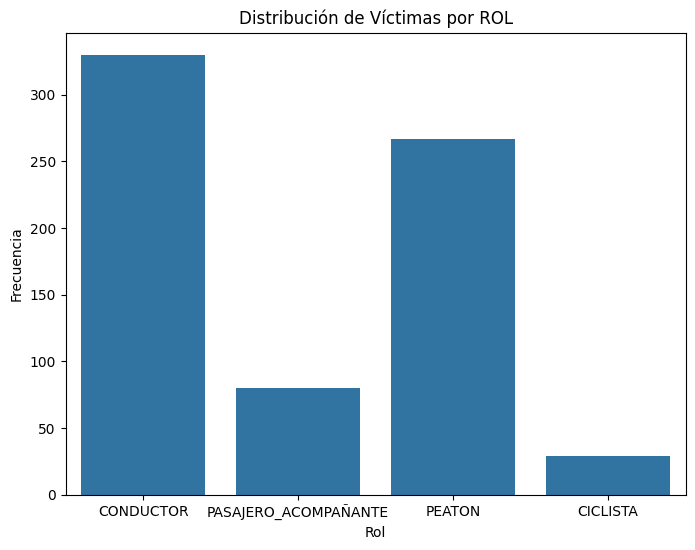

In [22]:
# gráfico de barras para rol
plt.figure(figsize=(8,6))
sns.countplot(x='ROL', data=victimas)
plt.title('Distribución de Víctimas por ROL')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.show()

### Distribución de sexo de las víctimas

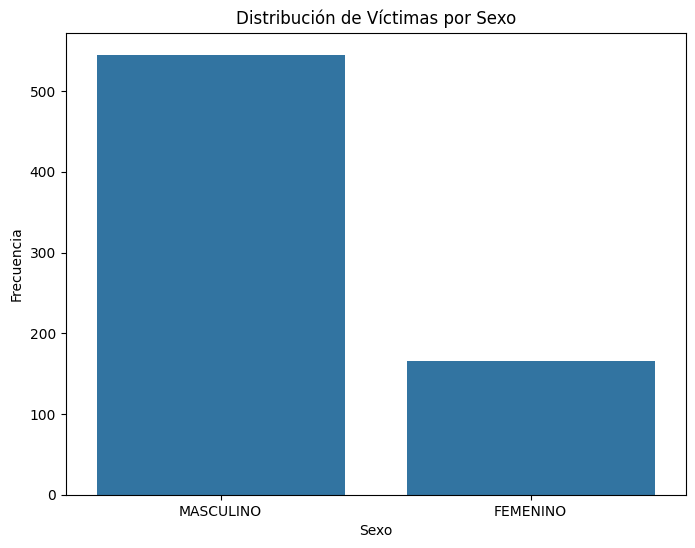

In [23]:
# gráfico de barras para sexo
plt.figure(figsize=(8,6))
sns.countplot(x='SEXO', data=victimas)
plt.title('Distribución de Víctimas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

### Distribución de edad de las víctimas

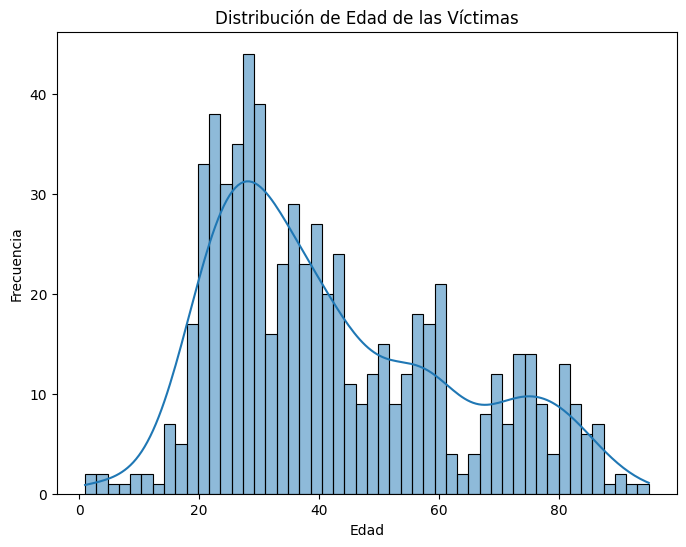

In [24]:
# histograma de la edad de las víctimas
plt.figure(figsize=(8,6))
sns.histplot(victimas['EDAD'], bins=50, kde=True)
plt.title('Distribución de Edad de las Víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Distribución temporal de las víctimas por fecha

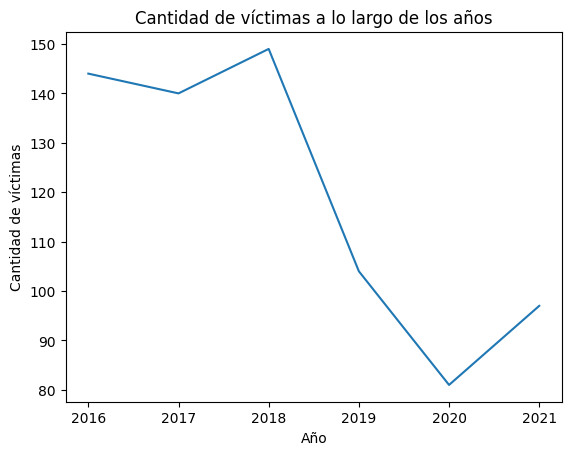

In [25]:
# Agrupar por año
victimas_por_ano = victimas.groupby(victimas['FECHA'].dt.year).size()

# Gráfico de líneas
victimas_por_ano.plot(kind='line')
plt.title('Cantidad de víctimas a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas')
plt.show()

### Relación entre rol y sexo de las víctimas

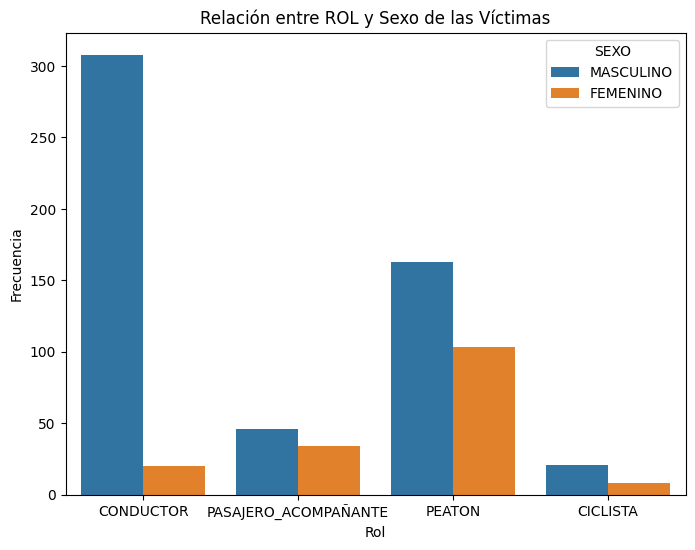

In [26]:
# cráfico de barras cruzado entre rol y sexo
plt.figure(figsize=(8,6))
sns.countplot(x='ROL', hue='SEXO', data=victimas)
plt.title('Relación entre ROL y Sexo de las Víctimas')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.show()

In [34]:
# distribución cruzada de rol y sexo
pd.crosstab(victimas['ROL'], victimas['SEXO'], margins=True)

SEXO,FEMENINO,MASCULINO,All
ROL,,,
CICLISTA,8,21,29
CONDUCTOR,20,308,328
PASAJERO_ACOMPAÑANTE,34,46,80
PEATON,103,163,266
All,165,538,703


### Distribución de edad por sexo

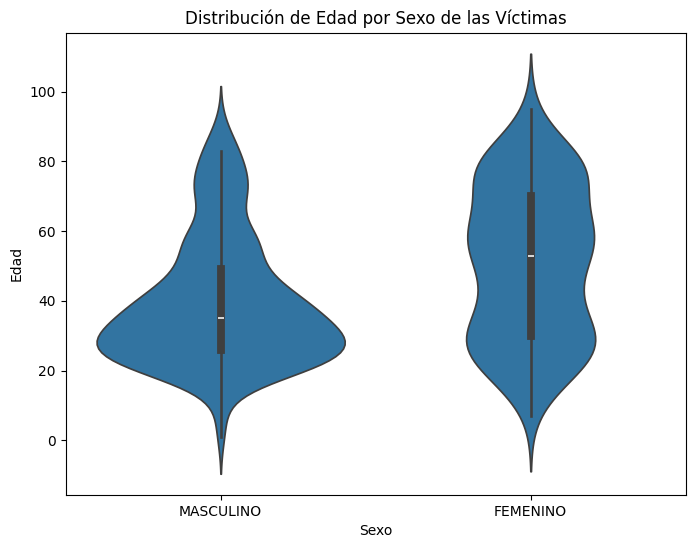

In [27]:
# violinplot para la distribución de edad por sexo
plt.figure(figsize=(8,6))
sns.violinplot(x='SEXO', y='EDAD', data=victimas)
plt.title('Distribución de Edad por Sexo de las Víctimas')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()

### Distribución de edad por rol

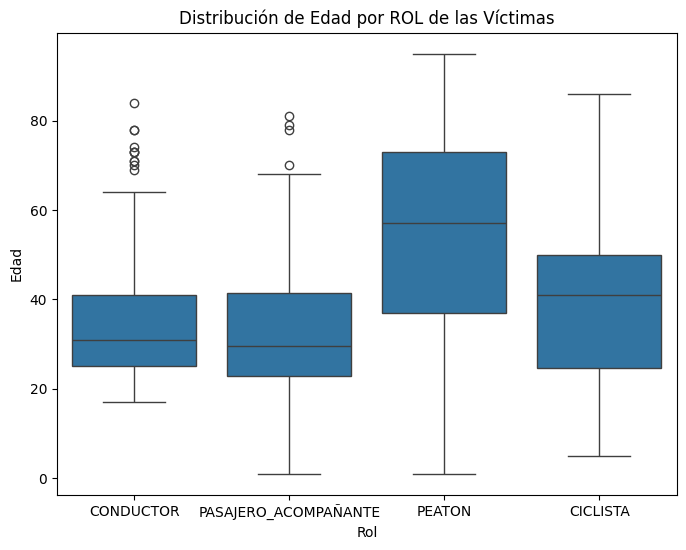

In [28]:
# boxplot de la edad por rol
plt.figure(figsize=(8,6))
sns.boxplot(x='ROL', y='EDAD', data=victimas)
plt.title('Distribución de Edad por ROL de las Víctimas')
plt.xlabel('Rol')
plt.ylabel('Edad')
plt.show()

### Distribución de las víctimas a lo largo del tiempo por sexo

In [29]:
# agrupar por año y sexo
victimas_ano_sexo = victimas.groupby([victimas['FECHA'].dt.year, victimas['SEXO']]).size()

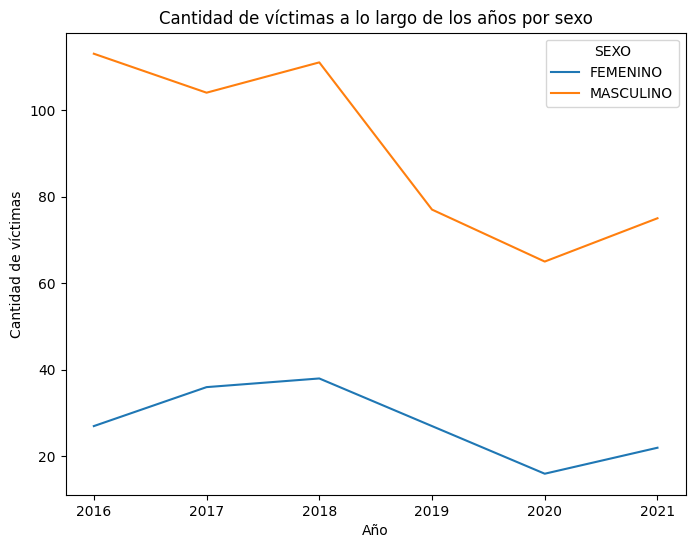

In [30]:
# gráfico de líneas con la distribución de víctimas por año y sexo
victimas_ano_sexo.unstack().plot(kind='line', figsize=(8,6))
plt.title('Cantidad de víctimas a lo largo de los años por sexo')
plt.xlabel('Año')
plt.ylabel('Cantidad de víctimas')
plt.show()

In [31]:
# agrupar por año y sexo
victimas_mes_sexo = victimas.groupby([victimas['FECHA'].dt.month, victimas['SEXO']]).size()

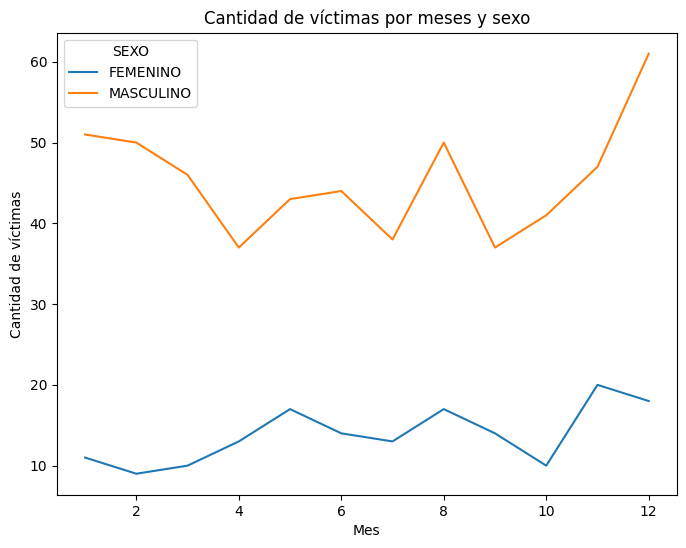

In [32]:
# gráfico de líneas con la distribución de víctimas por año y sexo
victimas_mes_sexo.unstack().plot(kind='line', figsize=(8,6))
plt.title('Cantidad de víctimas por meses y sexo')
plt.xlabel('Mes')
plt.ylabel('Cantidad de víctimas')
plt.show()

### Distribución por edad, sexo y rol

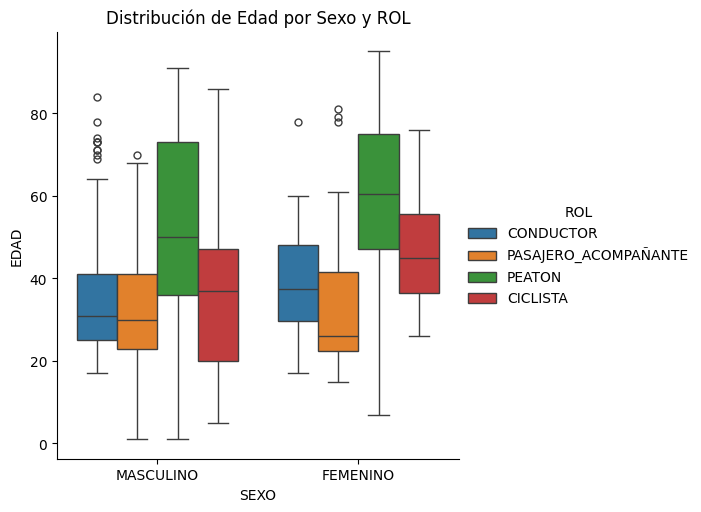

In [36]:
sns.catplot(x='SEXO', y='EDAD', hue='ROL', data=victimas, kind='box')
plt.title('Distribución de Edad por Sexo y ROL')
plt.show()

## Análisis de Outliers

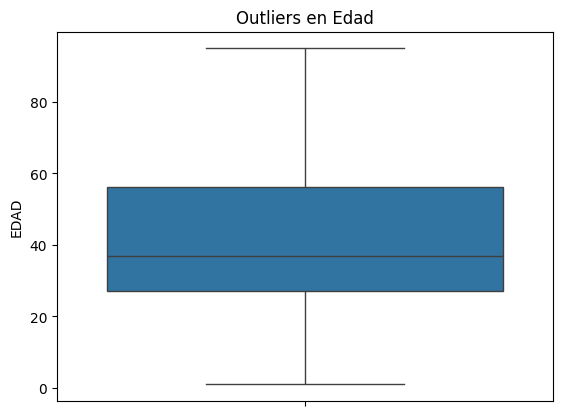

In [33]:
# Boxplot para identificar outliers en edad
sns.boxplot(victimas['EDAD'])
plt.title('Outliers en Edad')
plt.show()

## Observaciones:

- La mayoría de los roles de las víctimas son conductor y peatón (46.03% y 37.24% respectivamente).
- La mayoría de las víctimas son Motos y Peatones (42.26% y 37.24% respectivamente).
- El sexo más frecuente de las víctimas es masculino (76.01%).
- La mayoría de las víctimas tienen entre 20 y 30 años.
- La mayoría de las víctimas fallecieron entre el año 2016 y el año 2018.
- En todos los roles, la mayoría de las víctimas son hombres.
- Entre las mujeres, la mayoría de las víctimas femeninas son peatones.
- Las víctimas masculinas tienden a tener entre 20 y 40 años.
- Las víctimas femeninas tienden a estar en un rango mayor que los hombres sin una concentración mayor en áreas específicas.
- Los peatones parecen tener una mayor distribución de edades, lo que podría indicar que personas de todas las edades están involucradas como víctimas cuando caminan.
- Los conductores y ciclistas parecen tener distribuciones de edad más concentradas, con la mayoría de las víctimas en estos roles siendo personas entre los 30 y 50 años.
- Los pasajeros/acompaniantes tienden a ser más jóvenes en promedio que los conductores, lo cual tiene sentido si consideramos que muchas veces los pasajeros pueden ser miembros de la familia o amigos más jóvenes.
- La mayoría de las víctimas masculinas fallecieron entre los años 2016 al 2018.
- La mayoría de las víctimas femeninas fallecieron entre los años 2017 y 2018.

### Exportar DataFrame

In [28]:
# Exportar dataset final en ./src/data
victimas.to_csv('../src/data/victimas.csv', index=False)